# Project Requirements
You are to perform analysis of a data set: exploring the statistical summaries of the features, 
visualizing the attributes, and making conclusions from the visualizations and analysis. Follow the 
CRISP-DM framework in your analysis (you are not performing all of the CRISP-DM outline, only 
the portions relevant to understanding and visualization). This report is worth 20% of the final 
grade. Please upload a report (one per team) with all code used, visualizations, and text in a single 
document. The format of the document can be PDF, *.ipynb, or HTML. You can write the report in 
whatever format you like, but it is easiest to turn in the rendered iPython notebook. 

# Grading Criteria
- Business Understanding (10 points total).
    - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure  he outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How  ould you measure the effectiveness of a good prediction algorithm? Be specific.
- Data Understanding (80 points total)
    - [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.
    - [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific. 
    - [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe  that they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.
    - [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart.  Explain for each attribute why the chosen visualization is appropriate.
    - [15 points] Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
    - [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification). 
    - [5 points] Are there other features that could be added to the data or created from existing features? Which ones?
- Exceptional Work (10 points total)
    - You have free reign to provide additional analyses.
    - One idea: implement dimensionality reduction, then visualize and interpret the results.


# Data inspection

In [2]:
# install needed libraries
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.execuatble} -m pip install pandas
#!{sys.execuatble} -m pip install numpy
#!{sys.executable} -m pip install sklearn

In [3]:
# required libraries
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [4]:

df = pd.read_csv('..\\dataset\\all_with_labels.csv')
print('total observations in dataset:', len(df))
print('total features in dataset: ', len(df.keys()))



total observations in dataset: 408880
total features in dataset:  87


## remove duplicates

In [5]:
df.drop_duplicates('sha1', inplace=True)
print('total unique observations in dataset: ', len(df))
print('data types used: ', df.dtypes)
print(df.info())

total unique observations in dataset:  204281
data types used:  sha1                             object
fpath                            object
vt_harmless                     float64
vt_undetected                   float64
vt_malicious                    float64
                                 ...   
doc_keyword_try_word_count        int64
doc_keyword_until_word_count      int64
doc_keyword_using_word_count      int64
doc_keyword_var_word_count        int64
doc_keyword_while_word_count      int64
Length: 87, dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 204281 entries, 0 to 408879
Data columns (total 87 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   sha1                                 204281 non-null  object 
 1   fpath                                204281 non-null  object 
 2   vt_harmless                          0 non-null       float64
 3   vt_undetected      

In [6]:
# use seaborn for cluster heatmap...
#import sys
#!{sys.executable} -m pip install seaborn

In [72]:
# remove unnecessary features
#print(df.columns)
subset = df[df.columns[7:]]
#subset.keys()
subset.drop(columns='obf_name', inplace=True)
#subset[subset.columns[:10]]
#subset.keys()
subset.describe()

subset['is_obf'] = pd.to_numeric(subset['is_obf'], downcast='integer')
subset.drop(subset.loc[subset['is_obf']==2].index, inplace=True)
subset.dtypes
subset.loc[subset['is_obf']==1]
subset.loc[subset['is_obf']==3]

C:\Users\research_laptop\AppData\Local\Temp\ipykernel_17960\2761424359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.drop(columns='obf_name', inplace=True)
C:\Users\research_laptop\AppData\Local\Temp\ipykernel_17960\2761424359.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['is_obf'] = pd.to_numeric(subset['is_obf'], downcast='integer')
C:\Users\research_laptop\AppData\Local\Temp\ipykernel_17960\2761424359.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,is_obf,char_hash_count,char_paren_count,char_brack_count,char_brace_count,char_bkslash_count,char_fwslash_count,char_dollar_count,char_squote_count,char_dquote_count,...,doc_keyword_return_word_count,doc_keyword_static_word_count,doc_keyword_switch_word_count,doc_keyword_throw_word_count,doc_keyword_trap_word_count,doc_keyword_try_word_count,doc_keyword_until_word_count,doc_keyword_using_word_count,doc_keyword_var_word_count,doc_keyword_while_word_count
391586,3,18,264,238,252,0,2,363,196,0,...,0,0,0,0,0,1,0,0,0,0
391588,3,119,244,166,150,4,20,352,82,53,...,0,0,2,0,0,1,0,0,0,2
391589,3,2,10,10,10,0,0,14,8,0,...,0,0,0,0,0,1,0,0,0,0
391590,3,3,10,8,6,0,0,9,3,4,...,0,0,0,0,0,1,0,0,0,0
391591,3,5,18,26,6,4,8,64,32,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408875,3,52,412,202,138,0,115,450,138,470,...,0,0,0,0,0,0,0,0,0,0
408876,3,16,34,4,26,7,6,53,2,16,...,0,0,0,0,0,0,0,0,0,0
408877,3,38,308,134,142,58,0,239,32,176,...,1,0,0,0,0,0,0,0,0,0
408878,3,3,42,0,26,1,0,31,3,68,...,0,0,0,0,0,3,0,4,1,0


C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


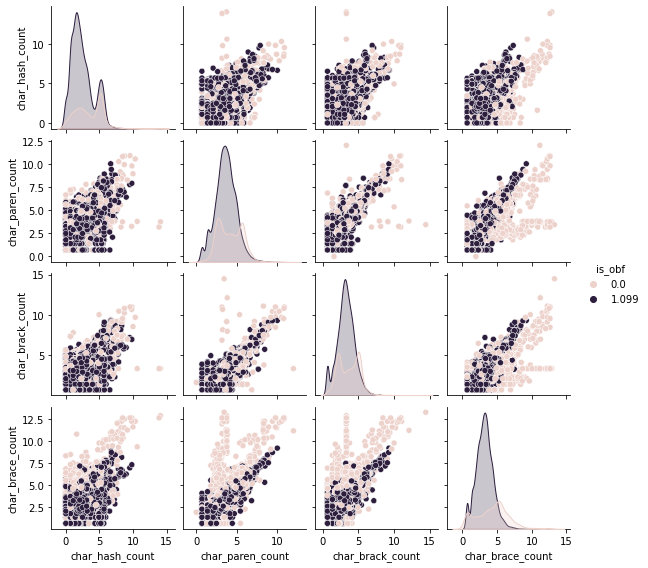

In [8]:

samples = subset.sample(n=10000)
samples.head()
samples['is_obf'].describe()
#samples.keys()
s = samples.loc[:, :'char_brace_count']
s.loc[:,]
sns.pairplot(np.log(s), hue="is_obf", height=2)

C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


AttributeError: module 'seaborn' has no attribute 'plot'

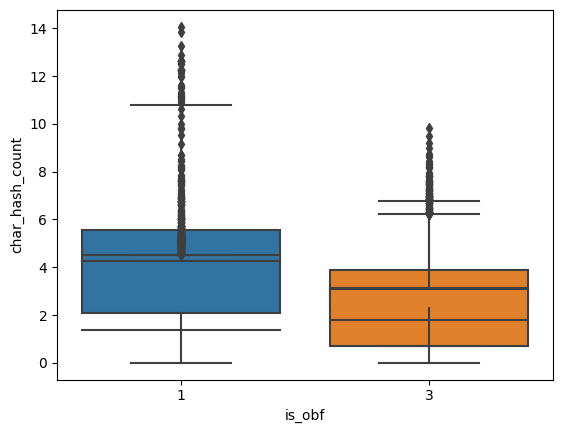

In [81]:
#sns.boxplot(x=s['is_obf'], y=np.log(s['char_paren_count']))
#sns.boxplot(x=s['is_obf'], y=np.log(s['char_hash_count']))
#sns.boxplot(x=s['is_obf'], y=np.log(s['char_brack_count']))
sns.boxplot(x=s['is_obf'], y=np.log(s['char_brace_count']))

for keyname in s.keys()[1:]:
    sns.boxplot(x=s.is_obf, y=np.log(s[keyname]))



C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:ylabel='Count'>

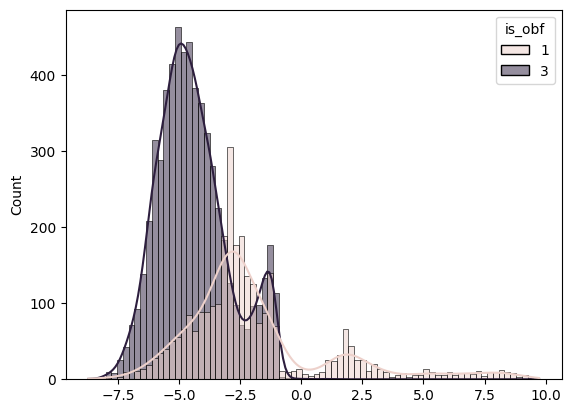

In [80]:
#sns.kdeplot(x=s['is_obf'], y=s.char_hash_count / samples.doc_char_count)
#sns.kdeplot(x=samples['is_obf'], y=np.log(samples.char_num_count))
#sns.kdeplot(x=samples['is_obf'], y=np.log(samples.doc_avg_line_len))
#sns.kdeplot(x=samples['is_obf'], y=samples.doc_entropy)
#sns.kdeplot(x=samples['is_obf'], y=np.log(samples.doc_line_count))
#sns.kdeplot(x=samples.is_obf, y=samples.doc_mcomment_count)
#sns.kdeplot(x=samples.is_obf, y=np.log(samples.char_excl_count))
#sns.kdeplot(x=samples.is_obf, y=np.log(samples.char_space_count))
#sns.kdeplot(x=samples.is_obf, y=np.log(samples.char_num_count))
#sns.kdeplot(x=samples.is_obf, y=samples.char_num_count / samples.doc_char_count)
#sns.kdeplot(x=samples.is_obf, y=np.log(samples.doc_char_count / samples.doc_line_count))

#sns.histplot(data=samples, x=np.log(samples.doc_char_count), hue="is_obf", kde=True)
#sns.histplot(data=samples, x=np.log(samples.doc_char_count / samples.doc_line_count), hue="is_obf", kde=True)
#sns.histplot(data=samples, x=np.log(samples.char_num_count / samples.doc_char_count), hue="is_obf", kde=True)
#sns.histplot(data=samples, x=np.log(samples.char_ucase_count / samples.doc_char_count), hue="is_obf", kde=True)
#sns.histplot(data=samples, x=np.log(samples.char_lcase_count / samples.doc_char_count), hue="is_obf", kde=True)
#sns.histplot(data=samples, x=np.log(samples.char_lcase_count / samples.char_ucase_count), hue="is_obf", kde=True)
#sns.histplot(data=samples, x=np.log(samples.char_ucase_count / samples.char_lcase_count), hue="is_obf", kde=True)
sns.histplot(data=samples, x=np.log(samples.char_num_count / samples.char_lcase_count), hue="is_obf", kde=True)

C:\Users\research_laptop\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


30 24 26


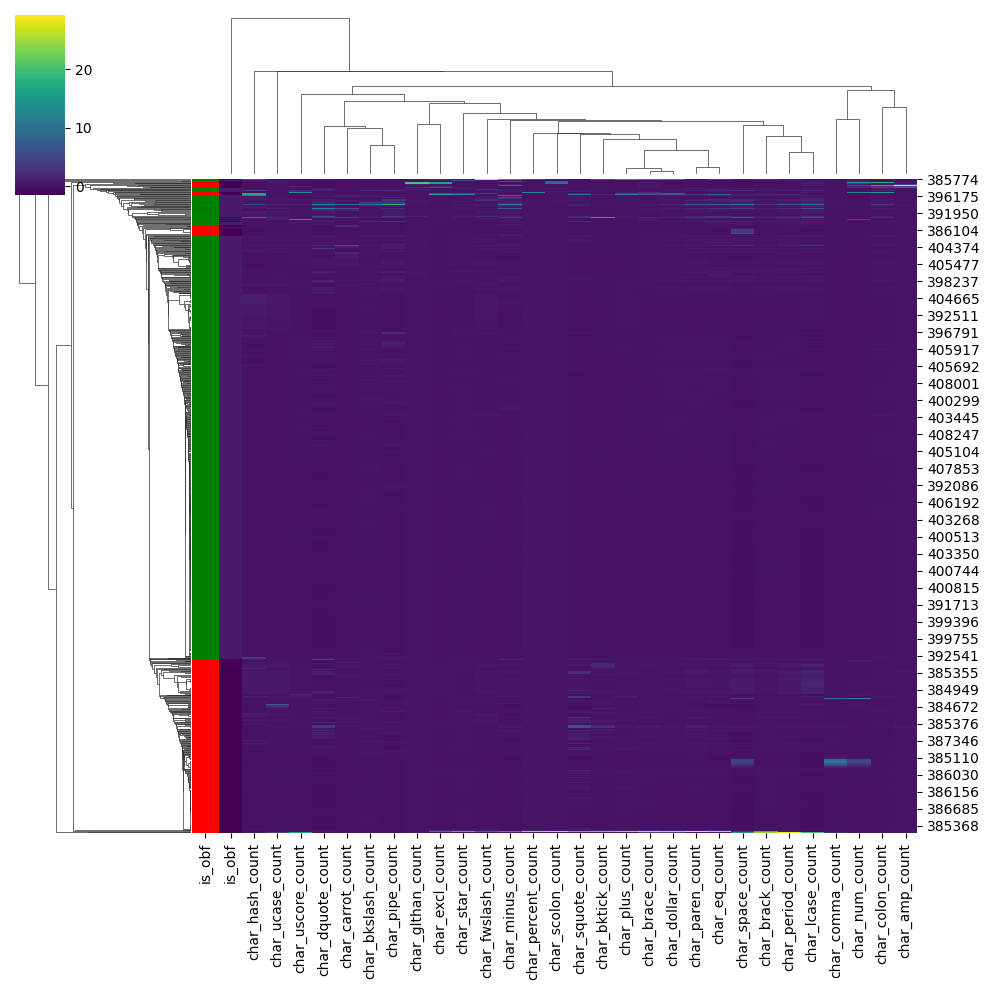

In [70]:
samp2 = subset.sample(n=1000)
s1 = samp2.loc[:, :'char_excl_count']
my_palette = dict(zip(s1.is_obf.unique(), ["green","red"]))
row_colors = s1.is_obf.map(my_palette)
tmp = s1.copy()
scaler = StandardScaler()
#tmp.dropna(how='any', inplace=True)
scaled_data=pd.DataFrame(scaler.fit_transform(tmp), columns=tmp.columns)
#sns.clustermap(scaled_data, metric="euclidean", method="ward", row_colors=row_colors, cmap="viridis",standard_scale=1)
#sns.clustermap(s1, metric="correlation", method="single", row_colors=row_colors, cmap="viridis", z_score=1)
#sns.clustermap(s1, metric="correlation", method="single", row_colors=row_colors, cmap="viridis", standard_scale=1)

s2 = samp2.loc[:,'doc_char_count':'doc_keyword_dynamicparam_word_count']
s3 = samp2.loc[:,'doc_keyword_dynamicparam_word_count':]
print(len(s1.keys()), len(s2.keys()), len(s3.keys()))
#len(s2.columns)
#sns.clustermap(s2, metric="euclidean", method="ward", row_colors=row_colors, cmap="viridis")
#sns.clustermap(s3, metric="euclidean", method="ward", row_colors=row_colors, cmap="viridis")


In [60]:
from sklearn.feature_selection import VarianceThreshold
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(samp2)
print(samp2.shape)
print(X_train_remove_variance.shape)
print(X_train_remove_variance)
print(s1.var())
print(s2.var())
print(s3.var())

(1000, 79)
(1000, 77)
[[   3.    7.   82. ...    0.    0.    0.]
 [   3.    4.   38. ...    0.    0.    0.]
 [   3.  205.    4. ...    0.    0.    0.]
 ...
 [   3. 1108.  802. ...    0.    0.    0.]
 [   3.    2.   10. ...    0.    0.    0.]
 [   3.    6.   44. ...    0.    0.    0.]]
is_obf                8.933093e-01
char_hash_count       3.834487e+04
char_paren_count      9.525446e+05
char_brack_count      1.838873e+06
char_brace_count      7.649613e+07
char_bkslash_count    2.053470e+03
char_fwslash_count    6.951989e+04
char_dollar_count     1.965033e+07
char_squote_count     4.182519e+05
char_dquote_count     2.804454e+04
char_bktick_count     1.582327e+09
char_colon_count      1.257746e+04
char_scolon_count     6.075088e+04
char_star_count       2.290168e+02
char_minus_count      2.063322e+05
char_plus_count       1.611626e+06
char_percent_count    7.288576e+05
char_carrot_count     1.133170e+01
char_comma_count      1.055490e+07
char_period_count     4.312071e+05
char_glthan_co

In [18]:


# times out... maybe use less features...
#sns.clustermap(subset) 
samples = subset.sample(n=10000)
samples.head()
scaled_samples = samples.copy()
scaler = StandardScaler()
scaled_samples=pd.DataFrame(scaler.fit_transform(scaled_samples), columns=scaled_samples.columns)
scaled_samples.head()

scaled_data = subset.copy()
scaled_data=pd.DataFrame(scaler.fit_transform(scaled_data), columns=scaled_data.columns)
#sns.set()
#sns.pairplot(samples[samples.columns[:5]], height=2)


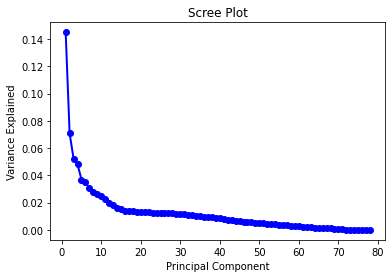

In [34]:

#pca on scaled data
scaled_samples.head()
pca = PCA(n_components=len(scaled_data.columns))
pca_fit = pca.fit(scaled_data)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [42]:
#using scaled data we only get to 98% explained variance with 60+ features remaining...
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:60]))

[1.44942175e-01 7.07661376e-02 5.23099361e-02 4.80477489e-02
 3.69621753e-02 3.49499666e-02 3.08040614e-02 2.74598967e-02
 2.61295656e-02 2.48362225e-02 2.27511950e-02 1.94646980e-02
 1.81668625e-02 1.60728236e-02 1.54122543e-02 1.40518982e-02
 1.39323289e-02 1.36429969e-02 1.32446445e-02 1.29921237e-02
 1.28587334e-02 1.27797871e-02 1.27395954e-02 1.26932691e-02
 1.26348990e-02 1.24656896e-02 1.23942216e-02 1.21734468e-02
 1.19462308e-02 1.16056160e-02 1.13311738e-02 1.10326962e-02
 1.06387132e-02 1.02854317e-02 1.01444242e-02 9.78842838e-03
 9.37578016e-03 9.26350444e-03 8.88582091e-03 8.81969368e-03
 8.30365999e-03 7.58075523e-03 7.33517275e-03 6.73474778e-03
 6.44843696e-03 6.02879699e-03 5.87036848e-03 5.77971443e-03
 5.15827240e-03 5.05469659e-03 4.81358442e-03 4.54843130e-03
 4.19143334e-03 4.07635246e-03 3.92369662e-03 3.49399317e-03
 3.35198667e-03 3.13628249e-03 3.00592632e-03 2.60356535e-03
 2.43953630e-03 2.33292632e-03 2.15755712e-03 1.71030190e-03
 1.58024723e-03 1.454673

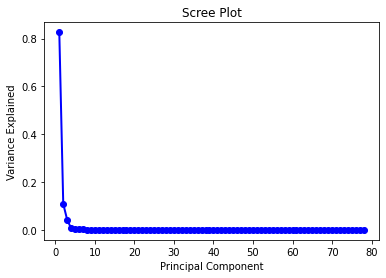

In [43]:
#unscaled data
pca = PCA(n_components=len(subset.columns))
pca_fit = pca.fit(subset)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [44]:
# with unscaled data we get to 98% explained variance with 4 components
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:4]))

[8.26197552e-01 1.08809052e-01 4.20911759e-02 6.52514713e-03
 5.91450405e-03 3.88826200e-03 2.00075747e-03 1.10128536e-03
 8.67193729e-04 7.18740016e-04 4.90270606e-04 4.20889456e-04
 3.24479778e-04 2.28457617e-04 1.58675827e-04 1.14429282e-04
 4.98723228e-05 2.60873217e-05 1.45375042e-05 1.24781409e-05
 9.53926292e-06 8.80642587e-06 7.87049316e-06 5.08964883e-06
 3.54126884e-06 3.05820643e-06 2.54700055e-06 2.39218291e-06
 1.43800262e-06 8.47535268e-07 6.01054369e-07 2.35251545e-07
 8.90532505e-08 2.67623556e-08 1.66674214e-08 1.15996273e-08
 9.24226740e-09 7.70392679e-09 6.23242299e-09 3.86830659e-09
 2.58478506e-09 2.37351266e-09 1.79395161e-09 1.59936789e-09
 1.45135014e-09 8.21800068e-10 6.58589463e-10 4.78024779e-10
 3.74581199e-10 3.71126948e-10 3.57301973e-10 3.34755212e-10
 3.22386565e-10 2.11754864e-10 1.50484554e-10 1.34572316e-10
 1.01158799e-10 9.22033819e-11 7.72676848e-11 6.03075705e-11
 5.42529858e-11 4.50486470e-11 3.67761818e-11 3.45549965e-11
 3.10786417e-11 1.686425

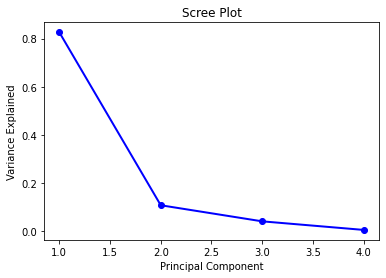

In [45]:
# pca for top 4 components
pca = PCA(n_components=4)
pca_fit = pca.fit(subset)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

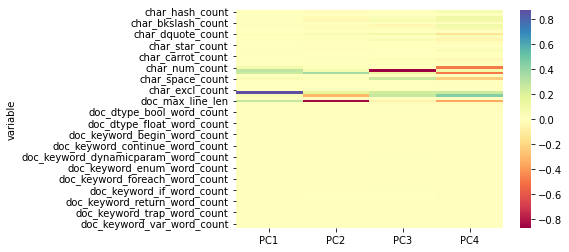

In [56]:
loadings = pca_fit.components_
num_pc = pca_fit.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = samples.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

ax = sns.heatmap(loadings_df, annot=False, cmap='Spectral')
plt.show()



In [62]:
loadings_df

,PC1,PC2,PC3,PC4
variable,,,,
char_hash_count,4.549902e-03,-2.293205e-02,0.023791,0.068502
char_paren_count,1.381114e-03,2.004184e-04,0.004477,0.005098
char_brack_count,7.212248e-03,-3.113134e-02,0.036600,0.101448
char_brace_count,1.303360e-02,-3.670191e-02,0.068849,0.098584
char_bkslash_count,7.915542e-04,1.867546e-03,0.003270,-0.002619
...,...,...,...,...
doc_keyword_try_word_count,6.195281e-06,1.400544e-05,0.000030,-0.000034
doc_keyword_until_word_count,2.701264e-07,5.792214e-07,0.000001,-0.000003
doc_keyword_using_word_count,2.410577e-06,5.372019e-06,0.000010,-0.000016
